In [2]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import QTable
from scipy.stats import kde
import pandas as pd
from tqdm import tqdm

In [39]:
len(fossil1),len(nonfossil)

(68, 114)

In [40]:
print(len(groups[1]))

182


In [41]:
#colores
red = []
blue = []
color = []
Nred = []
Nblue= []
Ncolor = []

for i in range(len(fossil1)):
    red.append([])
    blue.append([])
    color.append([])
for i in range(len(nonfossil)):
    Nred.append([])
    Nblue.append([])
    Ncolor.append([])

    
for i in range(len(fossil1)):
    group = len(groups[1][i])
    #print(group)
    for subhalo in range(group):
        #print(groups[1][fossil1[subhalo]])
        #this calculate the color
        #color[i][subhalo] = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[i]][subhalo]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][fossil1[i]][subhalo]]
        color[i].append(subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][i][subhalo]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][i][subhalo]])
        #y[subhalo] = subhalos['SubhaloStellarPhotometrics'][:,5][group] - subhalos['SubhaloStellarPhotometrics'][:,6][group]
        #print(y[subhalo]>0.3)
        #print(f'color: {y[subhalo]}')
        if color[i][subhalo]>=0.3:
            #print('a')
            red[i].append(color[i][subhalo])
        else: 
            #print('b')
            blue[i].append(color[i][subhalo])
            
for i in range(len(nonfossil)):
    group = len(groups[1][i])
    #print(group)
    for subhalo in range(group):
        Ncolor[i].append(subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][i][subhalo]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][i][subhalo]])
        if Ncolor[i][subhalo]>=0.3:
            #print('a')
            Nred[i].append(Ncolor[i][subhalo])
        else: 
            #print('b')
            Nblue[i].append(Ncolor[i][subhalo])

In [42]:
a = len(nonfossil)+ len(fossil1)
a

182

In [43]:
#mass
mass = []
radio = []
Nmass = []
Nradio = []

for i in range(len(fossil1)):
    mass.append(np.log10(halos['Group_M_Crit200'][fossil1[i]]/0.6774)+10)
    radio.append(halos['Group_R_Crit200'][fossil1[i]]/0.6774)
    
for i in range(len(nonfossil)):
    Nmass.append(np.log10(halos['Group_M_Crit200'][nonfossil[i]]/0.6774)+10)
    Nradio.append(halos['Group_R_Crit200'][nonfossil[i]]/0.6774)

In [44]:
#medians for the masses
medianmass = np.median(mass)
nmedianmass = np.median(Nmass)

#weight_post = np.ones_like(insituq_bin[:,0])/float(a)
weight_fossil = np.ones_like(mass)/float(a)
weight_nonfossil = np.ones_like(Nmass)/float(a)
#donde np.ones_like #módulo que hace un array de valores 1, del tamaño de otro array
#insityq_bin[:,0] #array sobre el cual haré el histograma
#float(len(stack[:,0]))  #valor en float del tamaño del array sobre el cual quiero hacer la normalización de 1  (muestra total)

In [45]:
weight_fossil = np.ones_like(mass)/len(fossil1)
weight_nonfossil = np.ones_like(Nmass)/len(nonfossil)
bins = np.arange(0,20,0.1)

/home/tnguser/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


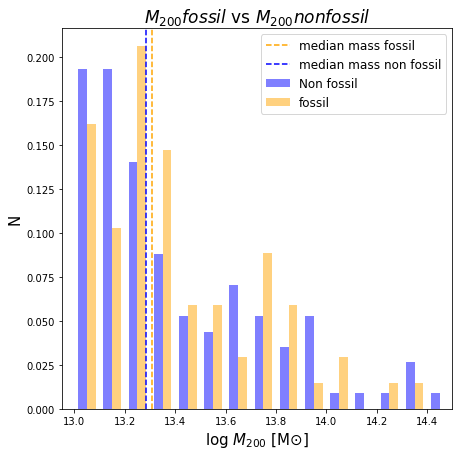

In [46]:
plt.figure(figsize=(7,7))
plt.title('$M_{200}fossil$ vs $M_{200}nonfossil$',fontsize=17)
plt.hist([Nmass, mass], bins=bins, color=['blue', 'orange'], rwidth=0.7, label =['Non fossil', 'fossil'], alpha=0.5, weights=[weight_nonfossil,weight_fossil])
#lt.hist(mass, bins=bins, color='orange',rwidth=0.7, label ='Fossil', alpha = 0.5)
plt.axvline(medianmass, color='orange', linestyle = '--', label='median mass fossil')
plt.axvline(nmedianmass, color='blue', linestyle = '--', label='median mass non fossil')
plt.xlim(12.95,14.5)
plt.xlabel('log $M_{200}$ [M$\odot$]',fontsize=15)
plt.ylabel('N',fontsize=15)
plt.legend(loc='upper right',fontsize=12)
plt.savefig('masscomparison.jpg')

In [47]:
fracred = []
for i in range(len(fossil1)):
    fracred.append(len(red[i])/(len(red[i])+len(blue[i])))

In [48]:
Nfracred = []
for i in range(len(nonfossil)):
    Nfracred.append(len(Nred[i])/(len(Nred[i])+len(Nblue[i])))

In [49]:
#medians for the fractions
medianfracred = np.median(fracred)
nmedianNfracred = np.median(Nfracred)

In [50]:
weight_fossil = np.ones_like(fracred)/len(fossil1)
weight_nonfossil = np.ones_like(Nfracred)/len(nonfossil)
bins= np.arange(0,1,0.05)

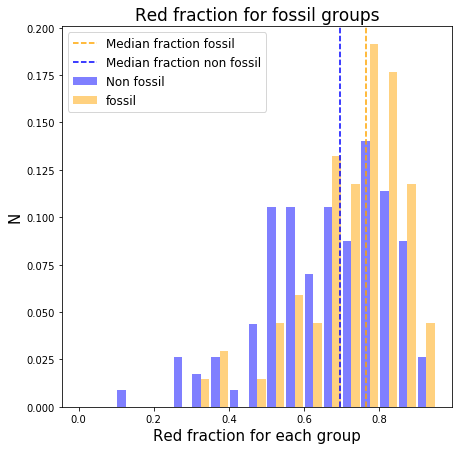

In [51]:
plt.figure(figsize=(7,7))
plt.title('Red fraction for fossil groups', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('Red fraction for each group',fontsize=15)
plt.hist([Nfracred, fracred], bins=bins, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])
#plt.hist(fracred, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil')
plt.axvline(medianfracred, color='orange', linestyle = '--', label='Median fraction fossil')
plt.axvline(nmedianNfracred, color='blue', linestyle = '--', label='Median fraction non fossil')
plt.legend(loc='upper left', fontsize=12)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('redfractionhistcomparison.jpg')

In [52]:
fracblue = []
for i in range(len(fossil1)):
    fracblue.append(len(blue[i])/(len(red[i])+len(blue[i])))

In [53]:
Nfracblue = []
for i in range(len(nonfossil)):
    Nfracblue.append(len(Nblue[i])/(len(Nred[i])+len(Nblue[i])))

In [54]:
#medians for the fractions
medianfracblue = np.median(fracblue)
nmedianNfracblue = np.median(Nfracblue)

In [55]:
weight_fossil = np.ones_like(fracblue)/float(a)
weight_nonfossil = np.ones_like(Nfracblue)/float(a)
bins = np.arange(0,1,0.05)

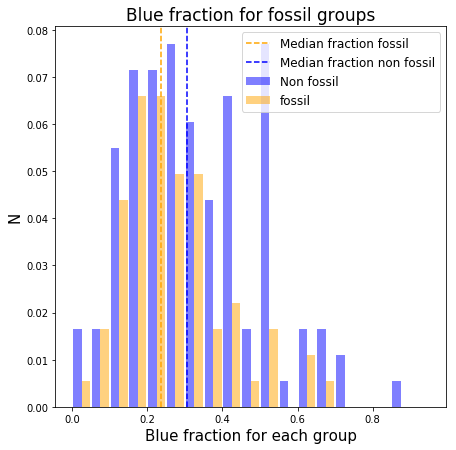

In [56]:
plt.figure(figsize=(7,7))
plt.title('Blue fraction for fossil groups', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('Blue fraction for each group',fontsize=15)
plt.hist([Nfracblue, fracblue], bins=bins, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(medianfracblue, color='orange', linestyle = '--', label='Median fraction fossil')
plt.axvline(nmedianNfracblue, color='blue', linestyle = '--', label='Median fraction non fossil')
plt.legend(loc='upper right', fontsize=12)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('bluefractionhistcomparison.jpg')

In [57]:
bins = np.arange(400,1500,50)

In [58]:
#medians for radios
medianradio = np.median(radio)
nmedianradio = np.median(Nradio)

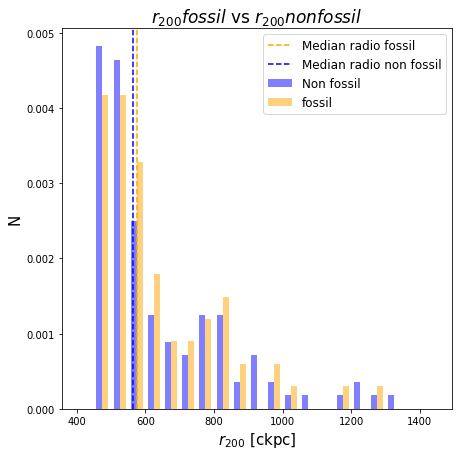

In [59]:
plt.figure(figsize=(7,7))
plt.title('$r_{200}fossil$ vs $r_{200}non fossil$',fontsize=17)
plt.hist([Nradio, radio], bins=bins, color=['blue', 'orange'], rwidth=0.7, label =['Non fossil', 'fossil'], alpha=0.5, density=True)
#plt.hist(radio, bins=bins, color='orange',rwidth=0.7, label ='Fossil', alpha = 0.5, density =True)
plt.axvline(medianradio, color='orange', linestyle = '--', label='Median radio fossil')
plt.axvline(nmedianradio, color='blue', linestyle = '--', label='Median radio non fossil')
#plt.xlim(12.75,14.7)
plt.xlabel('$r_{200}$ [ckpc]',fontsize=15)
plt.ylabel('N',fontsize=15)
plt.legend(loc='upper right',fontsize=12)
plt.savefig('radiocomparison.jpg')

# Star forming

In [63]:
halos['GroupMassType'][nonfossil[66],4] #o 65

38.53770065307617

In [64]:
sstarforming = []
Nsstarforming = []
stellarmass = []
Nstellarmass = []

for i in tqdm(range(len(fossil1))):
    a = halos['GroupSFR'][fossil1[i]]/((halos['GroupMassType'][fossil1[i],4]/0.67)*10**10)
    sstarforming.append(a)

for i in tqdm(range(len(nonfossil))):
    b = halos['GroupSFR'][nonfossil[i]]/((halos['GroupMassType'][nonfossil[i],4]/0.67)*10**10)
    Nsstarforming.append(b)
    
    

100%|██████████| 114/114 [00:00<00:00, 337677.02it/s]


In [65]:
sstarforming = np.log10(sstarforming)
Nsstarforming = np.log10(Nsstarforming)

In [66]:
mediansSFR = np.median(sstarforming)
nmedianNsSFR = np.median(Nsstarforming)

In [67]:
weight_fossil = np.ones_like(sstarforming)/float(len(fossil1))
weight_nonfossil = np.ones_like(Nsstarforming)/float(len(nonfossil))
bins = np.arange(0,1,0.05)

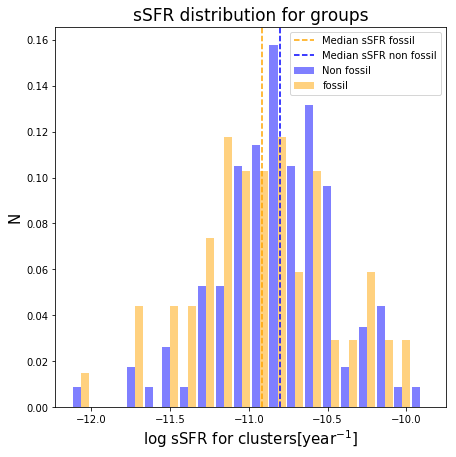

In [69]:
plt.figure(figsize=(7,7))
plt.title('sSFR distribution for groups', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('log sSFR for clusters[year$^{-1}$]',fontsize=15)
plt.hist([Nsstarforming, sstarforming], bins=20, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')
plt.legend(loc='upper right', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('ssfr.jpg')

In [42]:
fossil1 = pd.read_csv('fossil')

In [43]:
fossil1 = fossil1.drop('Unnamed: 0', axis=1)

In [71]:
nonfossil = pd.read_csv('nonfossil.csv')

In [72]:
nonfossil = nonfossil.drop('Unnamed: 0', axis=1)

In [46]:
#This function is for read subhalos string to float
def read_sh(indice, tabla, columna):
    auxiliar = np.array(tabla[columna][indice][1:-1].split(','))
    auxiliar = auxiliar.astype(int)
    auxiliar = list(auxiliar)
    return(auxiliar)

In [73]:
for i in tqdm(range(len(nonfossil))):
    #fossil1['subhalos'][i] = read_sh(i, fossil1, 'subhalos')
    nonfossil['subhalos'][i] = read_sh(i, nonfossil, 'subhalos')
    #nonfossil_df['subhalos'][i] = np.array(nf['subhalos'][i][1:-1].split(',')).astype(float)

  0%|          | 0/114 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 114/114 [00:09<00:00, 12.27it/s]


In [49]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields2 = ['SubhaloLen','SubhaloFlag','SubhaloMass','SubhaloSFRinRad','SubhaloGrNr', 'SubhaloMassType','SubhaloStellarPhotometrics', 'SubhaloMassInRadType', 'SubhaloPos']
#cambiar la masa total por la masa estelar que deberia estar en el array de masstype
snapNum = 99
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=fields2)

In [74]:
sstarforming_each = []
Nsstarforming_each = []
stellarmass_each = []
Nstellarmass_each = []

for i in tqdm(range(len(fossil1))):
    a = subhalos['SubhaloSFRinRad'][fossil1.iloc[i,1]]/(np.log(subhalos['SubhaloMassInRadType'][fossil1.iloc[i,1],4])/0.67)
    sstarforming_each.append(a)
for i in tqdm(range(len(nonfossil))):
    b = subhalos['SubhaloSFRinRad'][nonfossil.iloc[i,1]]/(np.log(subhalos['SubhaloMassInRadType'][nonfossil.iloc[i,1],4])/0.67)
    Nsstarforming_each.append(b)

#for i in tqdm(range(len(nonfossil))):
#    b = halos['GroupSFR'][nonfossil[i]]/(np.log10(halos['GroupMassType'][nonfossil[i],4])/0.67 + 10)
#    Nsstarforming_each.append(b)

100%|██████████| 114/114 [00:00<00:00, 17571.32it/s]


In [75]:
fossil1['sstarforming_each'] = sstarforming_each

In [76]:
nonfossil['Nsstarforming_each'] = Nsstarforming_each

In [85]:
QF_f=[]
QF_nf=[]
for i in range(len(fossil1)):
    a = np.where(fossil1['sstarforming_each'][i] == 0)[0]
    QF_f.append(len(a)/len(fossil1['sstarforming_each'][i]))

for i in range(len(nonfossil)):
    a = np.where(nonfossil['Nsstarforming_each'][i] == 0)[0]
    QF_nf.append(len(a)/len(nonfossil['Nsstarforming_each'][i]))
#nonfossil['Nsstarforming_each']

In [86]:
fossil1['QF'] = QF_f
nonfossil['QF'] = QF_nf

## El grafico viene aqui

In [98]:
medianQF = np.median(fossil1['QF'])
mediannQF = np.median(nonfossil['QF'])

In [99]:
weight_fossil = np.ones_like(fossil1['QF'])/len(fossil1)
weight_nonfossil = np.ones_like(nonfossil['QF'])/len(nonfossil)
bins=np.arange(0, 1, 0.05)

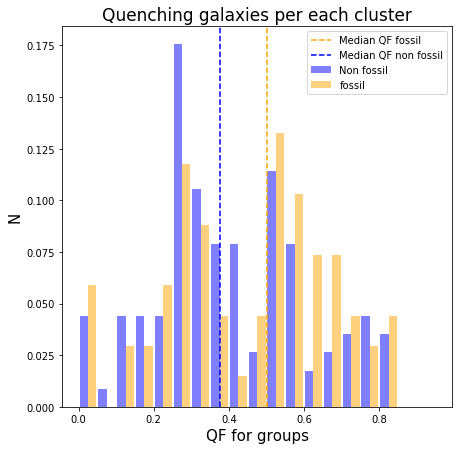

In [102]:
plt.figure(figsize=(7,7))
plt.title('Quenching galaxies per each cluster', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups',fontsize=15)
plt.hist([nonfossil['QF'],fossil1['QF']], bins=bins, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

plt.axvline(medianQF, color='orange', linestyle = '--', label='Median QF fossil')
plt.axvline(mediannQF, color='blue', linestyle = '--', label='Median QF non fossil')
plt.legend(loc='upper right', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('QF.jpg')